##데이터 처리

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/insurance.csv')

In [432]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [433]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


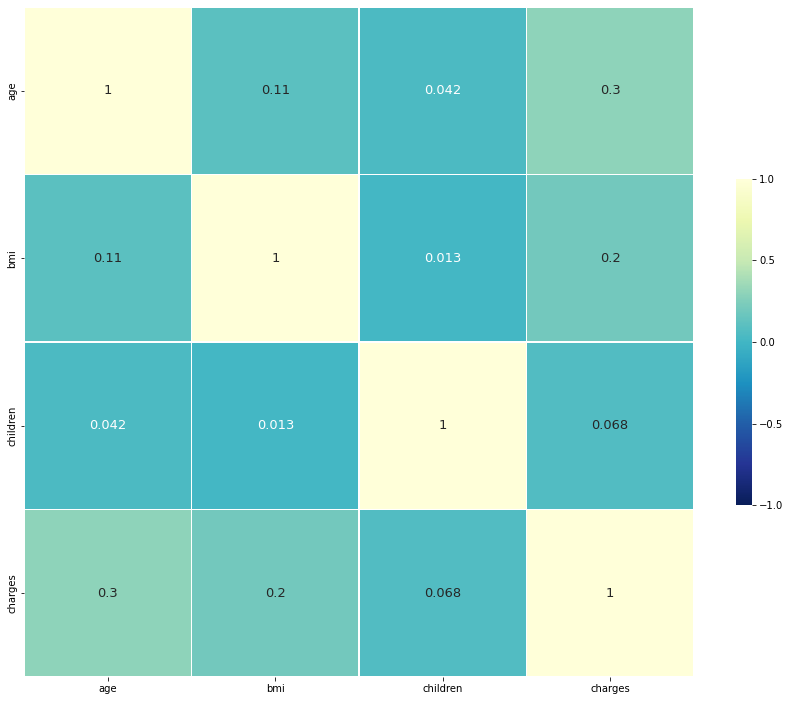

In [153]:
f, ax = plt.subplots(figsize=(15, 15)) #크기 지정
heatmap = sns.heatmap(df.corr(),
                      square = True,
                      linewidths = .5,
                      cmap = 'YlGnBu_r',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -0.5, 0 , 0.5 , 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 13}
                     )
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Linear Regression

In [154]:
#!pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [319]:
X = df[['age']].values
y = df['charges'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123123) #이런 부분에서 조작하지 말 것!
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 1)
(268, 1)
(1070,)
(268,)


In [227]:
#Residual sum of squares between the observed targets in the dataset, 
#and the targets predicted by the linear approximation. 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
#Linear Regression 구현
#(기울기가 음수면 양의 방향, 양수면 음의 방향으로 이동하며 기울기가 0인 지점 찾기)
X_train_two=X_train.reshape((-1,))
error=99999999999999999999999999999999
for z in range(1,999):#300):
  errortwo=0
  intcept=(y_train.sum()-z*X_train_two.sum())/len(X_train_two)
  for i in range(len(X_train_two)):
    weightx=z*X_train_two[i] 
    errortwo=errortwo+(y_train[i]-weightx-intcept)**2
  if errortwo<=error: 
    #print(error)    
    error=errortwo
    #print(errortwo)
  else: 
    print(np.sqrt(error/len(X_train_two)))
    print(z)
    print(intcept)
    break

11551.04439318549
247
3576.7723326345786


In [350]:
#Gradient Descent와 유사한 구현 #w=w-lr*dJdw
#초기 weight 설정에 대해선 weight initialization 검색
import sympy #symbolic 
weight=0
k,v,t,u=sympy.symbols('w v t u') #시그마는 그냥 쭉 더하라는 의미이므로 미분값을 시그마 취한 것과 같다
f=(k*v+u-t)**2
dfdk=sympy.diff(f,k)
dfdu=sympy.diff(f,u)
print(dfdk,dfdu,sep='\n')
wantprint=0
while True:
  lr=0.00000009
  lrtwo=0.000007
  inter=0
  while True:
    d_inter=0
    for i in range(len(X_train_two)):
      d_inter=d_inter+2*(weight*X_train_two[i]+inter-y_train[i])
    interbefore=inter
    inter=inter-lrtwo*d_inter
    if round(interbefore)==round(inter):
      break
  d_weight=0
  for i in range(len(X_train_two)):
    d_weight=d_weight+2*X_train_two[i]*(weight*X_train_two[i]+inter-y_train[i])
  weightbefore=weight
  weight=weight-lr*d_weight
  wantprint+=1
  if wantprint%10==0:
    print(wantprint,'th try:',weightbefore,'x +',inter)
  if round(weightbefore)==round(weight):
    print(wantprint,'th try:',weightbefore,'x +',inter)
    break

2*v*(-t + u + v*w)
-2*t + 2*u + 2*v*w
10 th try: 75.6942795736854 x + 10225.496307596273
20 th try: 134.0923431946321 x + 7937.401408864789
30 th try: 173.76920005762176 x + 6384.494093076517
40 th try: 200.6804560131524 x + 5333.494963756806
50 th try: 218.95026232664824 x + 4611.4726844592515
60 th try: 231.52217350214318 x + 4122.475906669938
62 th try: 233.50167173359023 x + 4041.4713517084815


In [204]:
print([x for x in linear_model.coef_],linear_model.intercept_)

[246.23135111188415] 3606.8617039688033


In [205]:
print(linear_model.predict([[50]]))
print(linear_model.coef_[0]*50+linear_model.intercept_) #y=wx+b

[15918.42925956]
15918.42925956301


In [206]:
y_pred = linear_model.predict(X_test)

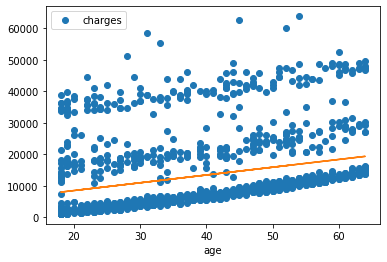

In [207]:
df.plot(x='age', y='charges', style= 'o')
plt.plot(X_test,y_pred)
plt.show()

In [208]:
from sklearn.metrics import mean_squared_error, r2_score
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print(test_rmse)
print(test_r2)

11559.793245102483
0.11668958380691863


In [225]:
#Error 기반 / 그외 MAE, MSLE 등 여러 기법 존재 
#Root Mean Squared Error
mse=0
for i in range(len(y_test)):
  mse=mse+(y_test[i]-y_pred[i])**2
print(np.sqrt(mse/len(y_test)))

#R^2 (데이터의 평균을 기준으로 회귀직선, 잔차로 나눔) (설명력이 높다)
sst=0
sse=0
for i in range(len(y_test)):
  sst=sst+(y_test[i]-y_test.mean())**2
  sse=sse+(y_test[i]-y_pred[i])**2
print(1-(sse/sst))

11559.79324510248
0.11668958380691796


## Polynomial Regression

In [264]:
quadratic = PolynomialFeatures(degree = 3)

X_train_quad = quadratic.fit_transform(X_train) #X_train values 재정의; x -> x, x^2
X_test_quad = quadratic.fit_transform(X_test)

#모델 훈련
poly_model = LinearRegression()
poly_model.fit(X_train_quad, y_train)

#예측
y_pred_poly = poly_model.predict(X_test_quad)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
test_r2 = r2_score(y_test, y_pred_poly)
print(test_rmse)
print(test_r2)
print(X_train[:3])
print(X_train_quad[:3]) #0,1,2승

12764.219356807269
-0.07696536549538702
[[47]
 [28]
 [58]]
[[1.00000e+00 4.70000e+01 2.20900e+03 1.03823e+05]
 [1.00000e+00 2.80000e+01 7.84000e+02 2.19520e+04]
 [1.00000e+00 5.80000e+01 3.36400e+03 1.95112e+05]]


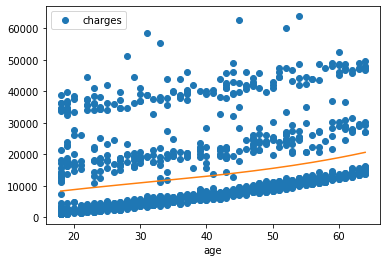

In [265]:
df.plot(x='age', y='charges', style= 'o')
#plt.plot(X_test[:15],y_pred_poly[:15],"b-")
X_test.squeeze().sort()
X_test_forplot_quad = quadratic.fit_transform(X_test)
plt.plot(X_test,poly_model.predict(X_test_forplot_quad))
plt.show()

##Multiple Regression

In [434]:
df.replace({'male':0,'female':1,'yes':1,'no':0},inplace=True)
X = df.iloc[:,:-2].values
Y = df[['charges']].values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=123123) #이렇게 Y쓰지마요..

In [352]:
X_train.shape
linear_model_formult = LinearRegression()
linear_model_formult.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
print(linear_model_formult.coef_)
print(linear_model_formult.intercept_)

[[  251.80852973   134.36013835   329.95943992   449.38807734
  23754.57727857]]
[-12171.90802434]


In [290]:
y_test_pred = linear_model_formult.predict(X_test)

In [304]:
from sklearn.metrics import mean_squared_error, r2_score

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(test_rmse)
print(test_r2)

6037.358289437939
0.7590609915314693


In [292]:
ans = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted':y_test_pred.squeeze()})
ans.head()

,Actual,Predicted
0,11741.72600,11928.328684
1,1906.35825,2676.645872
2,10982.50130,15501.640760
3,3227.12110,5922.374798
4,36397.57600,28849.760177


In [293]:
quadratic = PolynomialFeatures(degree = 2)

X_train_quad = quadratic.fit_transform(X_train) #X_train values 재정의; 차수 낮은 순(0->2 맨앞부터 차례대로 곱해보기)
X_test_quad = quadratic.fit_transform(X_test)

#모델 훈련
poly_model = LinearRegression()
poly_model.fit(X_train_quad, y_train)

#예측
y_pred_poly = poly_model.predict(X_test_quad)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
test_r2 = r2_score(y_test, y_pred_poly)
print(test_rmse)
print(test_r2)
print(X_train[:3])
print(X_train_quad[:3])

4784.3450132012895
0.848693286033378
[[47.   1.  23.6  1.   0. ]
 [28.   0.  37.1  1.   0. ]
 [58.   1.  33.1  0.   0. ]]
[[1.00000e+00 4.70000e+01 1.00000e+00 2.36000e+01 1.00000e+00 0.00000e+00
  2.20900e+03 4.70000e+01 1.10920e+03 4.70000e+01 0.00000e+00 1.00000e+00
  2.36000e+01 1.00000e+00 0.00000e+00 5.56960e+02 2.36000e+01 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 2.80000e+01 0.00000e+00 3.71000e+01 1.00000e+00 0.00000e+00
  7.84000e+02 0.00000e+00 1.03880e+03 2.80000e+01 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.37641e+03 3.71000e+01 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 5.80000e+01 1.00000e+00 3.31000e+01 0.00000e+00 0.00000e+00
  3.36400e+03 5.80000e+01 1.91980e+03 0.00000e+00 0.00000e+00 1.00000e+00
  3.31000e+01 0.00000e+00 0.00000e+00 1.09561e+03 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]


##Ridge/Lasso

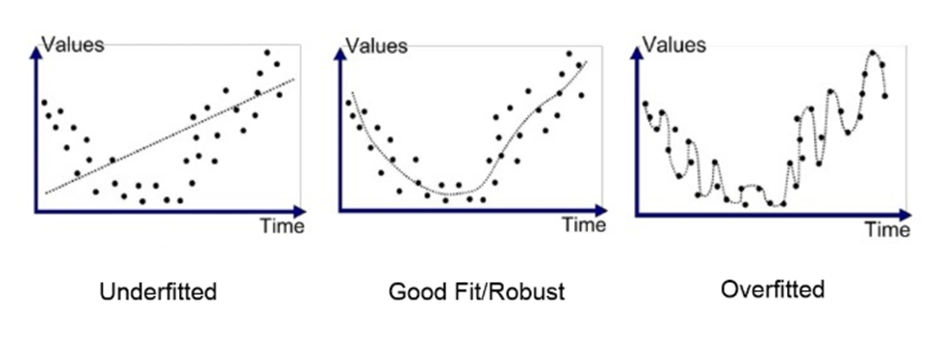

In [ ]:
#과적합을 줄이기 위해서 weight 조정
#weight regularization 검색

In [372]:
#Ridge: (모든 계수의 제곱합) X (지정된 상수 λ)
#Lasso: λ로 일부 계수를 정확하게 0으로 가게 만들 수 있다. 중요하지 않은 변수가 사라진 효과이므로 해석력에서 ridge보다 강력한 강점
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha = 0.1)
lasso1 = Lasso(alpha = 0.1) #alpha값 조정
ridge1.fit(X_train, y_train)
lasso1.fit(X_train, y_train)
y_test_pred_ridge = ridge1.predict(X_test)
y_test_pred_lasso = lasso1.predict(X_test)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
print(test_rmse_ridge,test_r2_ridge)
print(test_rmse_lasso,test_r2_lasso)

6037.489594736461 0.7590505111488435
6037.365697007011 0.7590604002882941


##Logistic Regression

In [435]:
df['overcharged']=df['charges']<df['charges'].mean() #평균보다 더내는가?
df.replace({False:0,True:1},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,overcharged
0,19,1,27.900,0,1,southwest,16884.92400,0
1,18,0,33.770,1,0,southeast,1725.55230,1
2,28,0,33.000,3,0,southeast,4449.46200,1
3,33,0,22.705,0,0,northwest,21984.47061,0
4,32,0,28.880,0,0,northwest,3866.85520,1


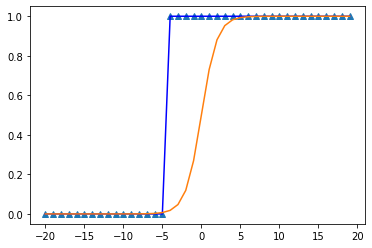

In [474]:
sr_sort=df.iloc[:40,7]
plt.plot(range(-20,20),sr_sort.sort_values(),'^')
plt.plot(range(-20,20),sr_sort.sort_values(),color='b')
plt.plot(range(-20,20),[1/(1+(np.exp(-(x+0)))) for x in range(-20,20)]) #0 대신 1,15
plt.ylim=[0,1]
plt.show()

In [439]:
y=df['overcharged']
X=df.iloc[:,:-3].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123123)

In [459]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print(logistic.score(X_test, y_test))
zz=logistic.predict(X_test)
count=0
for x in zz-y_test:
  if x==0:
    count+=1
print(count/len(y_test)) #전체 중에 일치한 개수 비율

0.8694029850746269
0.8694029850746269


## 그 외 https://scikit-learn.org/stable/modules/linear_model.html 참고